## Machine Learning

### Justificacion del modelo

Se utilizara una regresion lineal simple, ya que creemos que la relación entre las variables "total1" (variable independiente) y "bene1" (variable dependiente) es es aproximadamente lineal, a continuacion describiremos tabla y atributos:  

El dataframe utilizado es "~presupuestos_fonasa", el cual contiene todos los prepuestos para los distintos tramos de fonasa, en este caso trabajaremos en el tramo B (recordar que tramo A, no tiene beneficios en MLE).  
- "total1" es un monto en pesos que figura el arancel fijo de una prestacion medica para todos los centros medicos, el monton bruto, sin beneficios.
- "bene1" es el valor real que el usuario debe pagar, el descuento es cobrado al prestador de salud, en este caso FONASA.  

Lo que buscamos es predecir el valor "bene1" dado un "total1", dado que el sistema de salud siempre esta en evolucion, el asignar nuevos valores de copago para nuevas prestaciones medicas es necesario, para ello podemos utilizar informacion pasada para reconocer los patrones de asignacion.


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

presupuestos_df = pd.read_csv("./data/Presupuestos_MLE_2023_original_limpio.csv", encoding="latin1")

In [25]:
presupuestos_df.columns

Index(['secuencia', 'grupo', 'sub_grupo', 'presta', 'corr', 'titulo', 'anes1',
       'anesben1', 'anes2', 'anesben2', 'anes3', 'anesben3', 'equipo', 'pab',
       'NOMBRE_PRESTACIÓN', 'total1', 'bene1', 'total2', 'bene2', 'total3',
       'bene3', 'valcir11', 'valcir12', 'valcir13', 'valcir21', 'valcir22',
       'valcir23', 'valcir31', 'valcir32', 'valcir33', 'valcir41', 'valcir42',
       'valcir43', 'CODIGO_PRESTACIÓN'],
      dtype='object')

In [26]:
presupuestos_df.sample(10)

,secuencia,grupo,sub_grupo,presta,corr,titulo,anes1,anesben1,anes2,anesben2,...,valcir21,valcir22,valcir23,valcir31,valcir32,valcir33,valcir41,valcir42,valcir43,CODIGO_PRESTACIÓN
1846,3242,19,2,83,0,5,39710,19860,51620,31770,...,29358,38166,46972,0,0,0,0,0,0,1902083
2024,3577,21,4,111,0,5,33640,16820,43730,26910,...,28548,37112,45676,0,0,0,0,0,0,2104111
915,1568,11,3,18,0,5,33640,16820,43730,26910,...,28548,37112,45676,0,0,0,0,0,0,1103018
1792,3153,19,2,22,0,5,84150,42080,109400,67330,...,65254,84830,104406,0,0,0,0,0,0,1902022
1461,2587,17,3,41,0,5,93010,46510,120910,74410,...,61360,79769,98176,49088,63815,78541,0,0,0,1703041
599,946,4,1,151,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,401151
2076,3656,21,4,165,0,5,51660,25830,67160,41330,...,34732,45152,55572,0,0,0,0,0,0,2104165
1113,1906,13,1,39,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1301039
608,961,4,1,60,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,401060
2228,3907,24,1,13,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2401013


In [27]:
presupuestos_df

,secuencia,grupo,sub_grupo,presta,corr,titulo,anes1,anesben1,anes2,anesben2,...,valcir21,valcir22,valcir23,valcir31,valcir32,valcir33,valcir41,valcir42,valcir43,CODIGO_PRESTACIÓN
0,31,1,1,1,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,101001
1,32,1,1,201,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,101201
2,33,1,1,202,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,101202
3,34,1,1,203,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,101203
4,35,1,1,204,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,101204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422,4191,29,4,14,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2904014
2423,4192,29,4,15,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2904015
2424,4193,29,4,16,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2904016
2425,4194,29,4,17,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2904017


In [28]:
# Alivianar la carga de trabajo
presupuestos_df = presupuestos_df[["NOMBRE_PRESTACIÓN", "total1", "bene1", "total2", "bene2", "total3", "bene3"]]

**Trabajaremos con montos_totales bajo 1 millon de pesos...**  
Dado que la asignacion de prepuestos para prestaciones de alto costo, deberia ser una desicion humana y con cierto criterio etico.

In [29]:
presupuestos_acot_df = presupuestos_df[presupuestos_df["total1"] <= 1000000]

<Axes: >

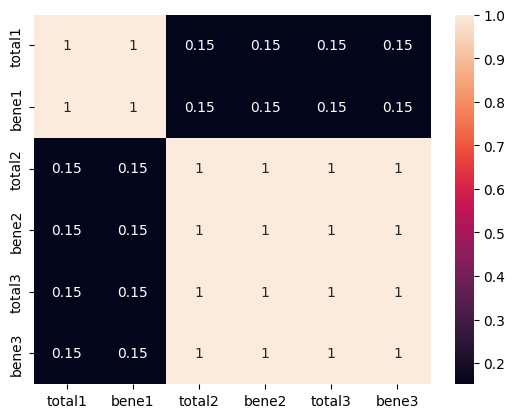

In [30]:
sns.heatmap(presupuestos_df.corr(numeric_only=True), annot=True)

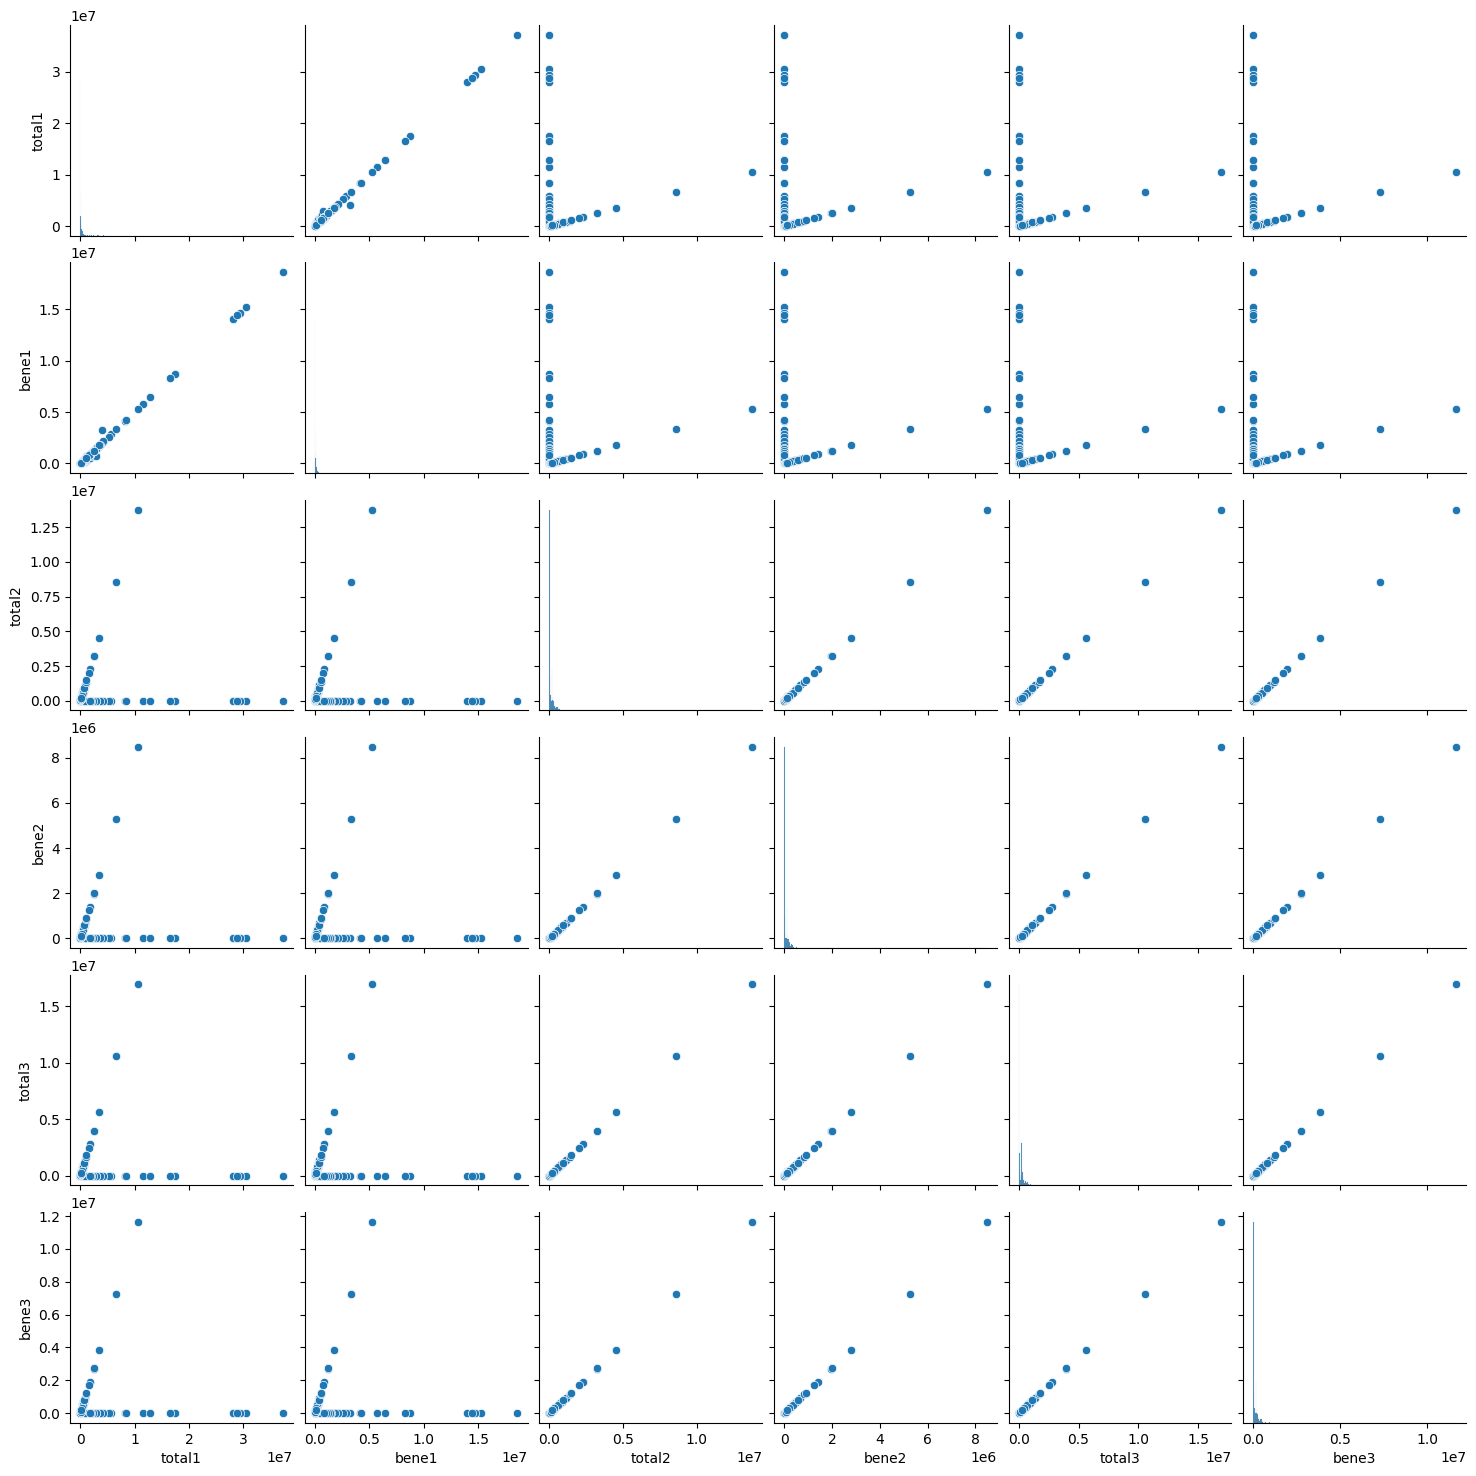

In [31]:
sns.pairplot(presupuestos_df)

Parece existir una correlacion perfecta entre nuestras variables... Es motivo de decepcion? para nada, vamos a conocer un modelamiento perfecto que revelara en el mejor de los casos y salvo valores atipicos el porcentaje de descuento asignado por fonasa a cada tramo, informacion que no es difundida y que a simple vista y sin conocer todos los datos, seria dificil de intuir.  
**Vamos a continuar...**

### La Regresion Lineal

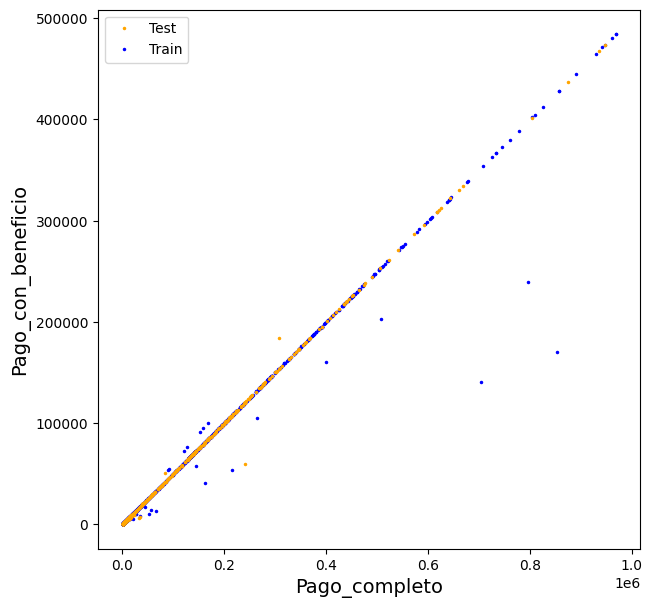

In [32]:
# Separar df para datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
train, test = train_test_split(presupuestos_acot_df, test_size=0.25, random_state=2)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.plot(test["total1"], test["bene1"], ".", markersize=3, color="orange", zorder=1, label="Test")
plt.plot(train["total1"], train["bene1"], ".", markersize=3, color="blue", zorder=0, label="Train")
ax.set_xlabel("Pago_completo",fontsize=14)
ax.set_ylabel("Pago_con_beneficio",fontsize=14)
ax.legend()

En primera instancia podemos ver la perfecta correlacion, descrita anteriormente.

In [33]:
# Ajustamos para usar sklearn
y_train = np.array(train["bene1"])
y_test = np.array(test["bene1"])

X_train = np.array(train["total1"])
X_train = X_train.reshape(X_train.shape[0], 1) # Un arreglo 2D, una columna muchas filas
X_test = np.array(test["total1"])
X_test = X_test.reshape(X_test.shape[0], 1)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()
linreg.fit(X_train, y_train) # Aqui aprende

# calculo de funcionamiento
y_pred_train = linreg.predict(X_train)
r2_lineal_train = linreg.score(X_train, y_train)
rmse_train = mean_squared_error(y_train, y_pred_train)

print("\nMétricas de Entrenamiento")
print(f"r^2 : {r2_lineal_train}") # R² o coeficiente de determinación -> 1 es mejor
print(f"RMSE {rmse_train}") # Raíz del error cuadrático medio (distancia punto a la linea) -> 0 es mejor
print(f"Coeficientes: {linreg.coef_[0], linreg.intercept_}") # Pendiente y cruce eje y

#predecir valores de y para el set de prueba
y_pred_test = linreg.predict(X_test)
r2_lineal_test = linreg.score(X_test, y_test)
rmse_test = mean_squared_error(y_test, y_pred_test)

print("\nMétricas de Prueba")
print(f"r^2 : {r2_lineal_test}")
print(f"RMSE {rmse_test}")



Métricas de Entrenamiento
r^2 : 0.9857414269255609
RMSE 80788876.07357095
Coeficientes: (np.float64(0.4892123414341468), np.float64(765.0676201920578))

Métricas de Prueba
r^2 : 0.9979559974049224
RMSE 11068985.425669638


**Metricas de Entrenamiento**  
R² (coeficiente de determinacion): 0.9857  
Esto indica que el modelo explica el 98.57% de la variabilidad en "bene1" usando "total1". Es un ajuste excelente.  

RMSE (error cuadratico medio): 80,788,876.07  
Aunque el valor absoluto parece alto, las magnitudes de los datos son grandes.  

Coeficientes:  
Intercepto: 765.0676  
Pendiente: 0.4892. Esto indica que por cada peso que aumenta "total1", "bene1" aumenta en aproximadamente 0.489 pesos.

**Metricas de Prueba**  
R²: 0.9979  
Similar al entrenamiento, el modelo tiene un ajuste excelente en los datos de prueba, explicando el 99.79% de la variabilidad.  

RMSE: 11,068,985.43  
El error en los datos de prueba es mucho menor que en el entrenamiento, lo cual indica un buen rendimiento.

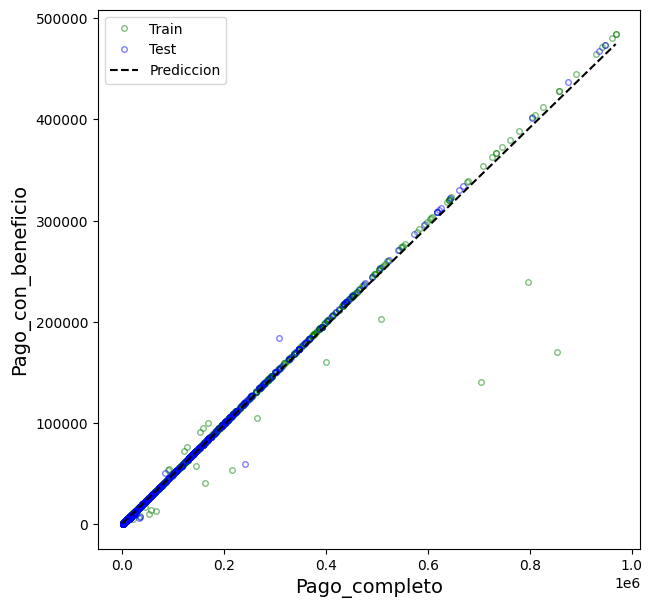

In [34]:
# Graficar - Regresion Lineal
fig1, ax = plt.subplots(1,1, figsize=(7,7))

ax.plot(train["total1"], train["bene1"],"o", markersize=4, mec="green", mfc="None", label="Train", alpha=0.5) 
ax.plot(test["total1"], test["bene1"],"o", markersize=4, mec="blue", mfc="None", label="Test", alpha=0.5) 

xgrid = np.linspace(np.min(train["total1"]), np.max(train["total1"]), 100)
ax.plot(xgrid, linreg.predict(xgrid.reshape(100, 1)), label="Prediccion", color="k", ls="--")
ax.set_xlabel("Pago_completo", fontsize=14)
ax.set_ylabel("Pago_con_beneficio", fontsize=14)
ax.legend()

**Ahora vamos a probarlo en vivo...**  
La funcion predecir_beneficio(). Predice el valor de 'bene1' dado un 'total1' usando el modelo entrenado  

Parametros:  
- total1_input: Valor de 'total1' para predecir  
- modelo: Modelo de regresión entrenado  

Retorna:  
- Prediccion de 'bene1'  

In [35]:
def predecir_beneficio(total1_input, modelo):
    total1_array = np.array([[total1_input]])
    bene1_pred = modelo.predict(total1_array)
    return bene1_pred[0]

# Solicita un valor de entrada y predice
while True:
    try:
        total1_input = float(input("Ingresa un valor para 'total1' (o escribe 'salir' para terminar): "))
        prediccion = predecir_beneficio(total1_input, linreg)
        print(f"Para un 'total1' de {total1_input}, el modelo predice un 'bene1' de {prediccion:.2f}")
    except ValueError:
        print("Entrada inválida. Asegúrate de ingresar un número o 'salir' para terminar.")
        break

Para un 'total1' de 123451.0, el modelo predice un 'bene1' de 61158.82
Para un 'total1' de 454555.0, el modelo predice un 'bene1' de 223138.98
Para un 'total1' de 567000.0, el modelo predice un 'bene1' de 278148.47
Entrada inválida. Asegúrate de ingresar un número o 'salir' para terminar.


**Resultados**  
El modelamiento es perfecto y es util, ahora puede conocer el monto copago para nuevas prestaciones medicas, y si quieres corroborar en caso que te cobren mal una prestacion.  